In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")



C:\Users\yotam\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yotam\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

In [9]:
import numpy as np
import pandas as pd
from collections import defaultdict


In [2]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')



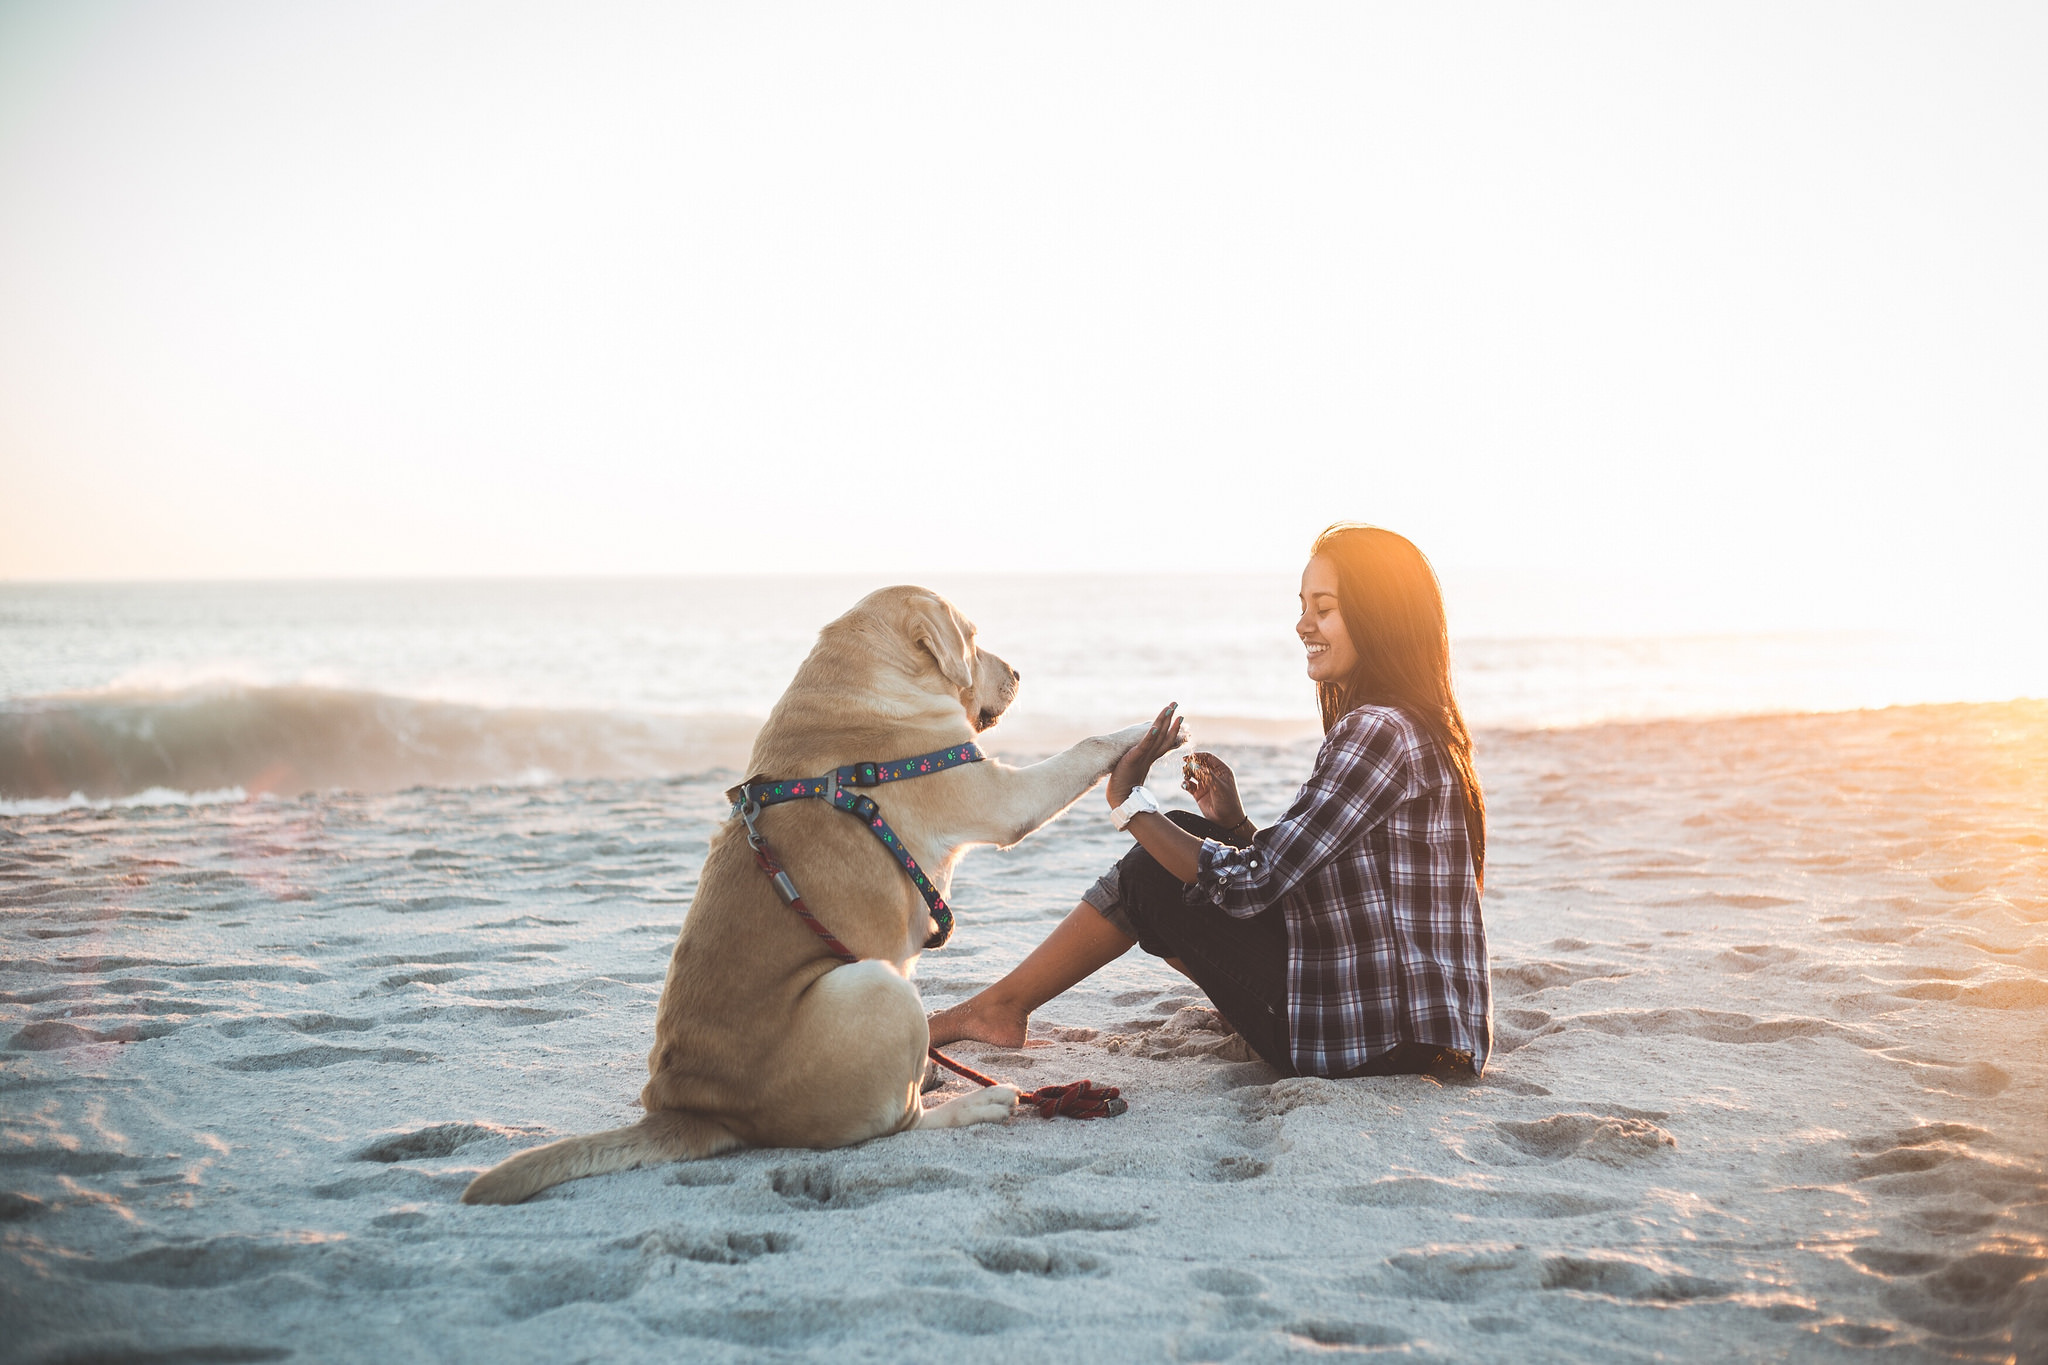

In [3]:
raw_image

In [5]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


In [6]:
# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


C:\Users\yotam\AppData\Roaming\Python\Python39\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach


In [7]:

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

woman sitting on the beach with her dog and a cell phone


In [10]:
df = pd.read_csv(r'C:\Users\yotam\Desktop\naya\df_clean_after_pca')
df = df[df['rating']!=0]
df_isbn = df['isbn']
num_dict = {}
for i,j in enumerate(df_isbn.unique()):
    num_dict[j]=i
df['isbn_num'] = df['isbn'].apply(lambda txt: num_dict[txt])
df = df.reset_index(drop = True)

In [11]:
list(df.columns)

['Unnamed: 0',
 'index',
 'user_id',
 'location',
 'age',
 'isbn',
 'rating',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'img_s',
 'img_m',
 'img_l',
 'Summary',
 'Language',
 'Category',
 'city',
 'state',
 'country',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',


In [12]:
df_category = pd.DataFrame(df['img_s'].unique())

In [14]:
df_category = df_category.rename(columns={0:"img_s"})

In [18]:
df_category.iloc[1]['img_s']

'http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg'

In [20]:
df_category['cover_page'] = '9'

In [21]:
df_category

img_s cover_page
0      http://images.amazon.com/images/P/0002005018.0...          9
1      http://images.amazon.com/images/P/0374157065.0...          9
2      http://images.amazon.com/images/P/0399135782.0...          9
3      http://images.amazon.com/images/P/0771074670.0...          9
4      http://images.amazon.com/images/P/1558746218.0...          9
...                                                  ...        ...
30913  http://images.amazon.com/images/P/0590449834.0...          9
30914  http://images.amazon.com/images/P/1573229067.0...          9
30915  http://images.amazon.com/images/P/0553269577.0...          9
30916  http://images.amazon.com/images/P/0451518144.0...          9
30917  http://images.amazon.com/images/P/0812553055.0...          9

[30918 rows x 2 columns]

In [ ]:
img_url = 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')



# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))